<a href="https://colab.research.google.com/github/adarshukla3005/Stock_sentiment_analysis/blob/main/Apple_stock_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import time

# Function to get FT Apple headlines
def get_ft_apple_headlines(pages=100):
    headlines = []
    base_url = "https://www.ft.com/search?q=Apple&page={}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    for page in range(1, pages + 1):
        url = base_url.format(page)
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, "html.parser")

        for item in soup.find_all('div', class_='o-teaser__content'):
            headline_tag = item.find('a', class_='js-teaser-heading-link')
            date_tag = item.find('time', class_='o-teaser__timestamp-date')

            if headline_tag and date_tag:
                headline = headline_tag.get_text().strip()
                date = date_tag.get_text().strip()
                headlines.append((headline, date))

        time.sleep(2)

    return headlines

# Fetch and print FT news headlines related to Amazon for 50 pages
ft_apple_headlines = get_ft_apple_headlines(pages=50)
for headline, date in ft_apple_headlines:
    print(f"Headline: {headline}\n Date: {date}\n")


Headline: Apple to settle ‘tap-and-go’ payments probe with EU
 Date: June 18, 2024

Headline: Apple set to be first Big Tech group to face charges under EU digital law
 Date: June 14, 2024

Headline: Newspaper groups warn Apple over ad-blocking plans
 Date: May 12, 2024

Headline: Apple targets Google staff to build artificial intelligence team
 Date: April 30, 2024

Headline: Apple’s belated AI gambit
 Date: June 12, 2024

Headline: Apple overtakes Microsoft as world’s most valuable company after push into AI
 Date: June 12, 2024

Headline: Hey Siri, is Apple’s AI strategy enough to sustain this rally?
 Date: June 13, 2024

Headline: Even Apple cannot explain why we need AI in our lives
 Date: June 14, 2024

Headline: Apple shares hit record high and push valuation back above $3tn
 Date: June 11, 2024

Headline: Apple shares hit record high and push valuation back above $3tn
 Date: June 11, 2024

Headline: Apple scraps its ‘buy now, pay later’ service in the US
 Date: June 17, 2024

H

In [ ]:
import pandas as pd
df = pd.DataFrame(ft_apple_headlines, columns=['Headline',  'Date'])

In [ ]:
df

,Headline,Date
0,Apple to settle ‘tap-and-go’ payments probe wi...,"June 18, 2024"
1,Apple set to be first Big Tech group to face c...,"June 14, 2024"
2,Newspaper groups warn Apple over ad-blocking p...,"May 12, 2024"
3,Apple targets Google staff to build artificial...,"April 30, 2024"
4,Apple’s belated AI gambit,"June 12, 2024"
...,...,...
987,The next act for generative AI,"December 28, 2023"
988,Warner Bros and Paramount CEOs hold explorator...,"December 21, 2023"
989,Death and succession at Berkshire,"May 7, 2024"
990,BHP-Anglo: when ‘final’ no longer means final,"May 23, 2024"


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by 'Date'
df = df.sort_values(by='Date')

# Group by 'Date' and combine headlines
grouped_df = df.groupby('Date').agg({'Headline': ' | '.join}).reset_index()

In [ ]:
grouped_df

,Date,Headline
0,2023-02-02,Apple’s revenue growth streak ends after suppl...
1,2023-02-05,Apple blundered when it killed off Dark Sky
2,2023-02-23,Apple/Luxshare: AR deal shows growing trust in...
3,2023-02-28,Brussels narrows Apple antitrust probe | Bruss...
4,2023-03-12,Cook bets on Apple’s mixed-reality headset to ...
...,...,...
294,2024-06-14,Stockpickers: AI forces RWS to learn a new voc...
295,2024-06-15,How real TV scandals and online abuse inspired...
296,2024-06-16,Business class | Apple supplier TDK claims sol...
297,2024-06-17,FirstFT: Defence groups rush to hire new staff...


In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import yfinance as yf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# def ft_apple_headlines(pages=50):
#     headlines = []
#     base_url = "https://www.ft.com/search?q=Amazon&page={}"
#     headers = {
#         "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
#     }

#     for page in range(1, pages + 1):
#         url = base_url.format(page)
#         response = requests.get(url, headers=headers)
#         soup = BeautifulSoup(response.content, "html.parser")

#         for item in soup.find_all('div', class_='o-teaser__content'):
#             headline_tag = item.find('a', class_='js-teaser-heading-link')
#             date_tag = item.find('time', class_='o-teaser__timestamp-date')

#             if headline_tag and date_tag:
#                 headline = headline_tag.get_text().strip()
#                 date = date_tag.get_text().strip()
#                 headlines.append((headline, date))

#         time.sleep(2)

#     return headlines

# # Fetch FT news headlines related to Apple for 50 pages
# ft_amazon_headlines = get_ft_amazon_headlines(pages=50)

# Create a DataFrame
df = pd.DataFrame(ft_apple_headlines, columns=['Headline', 'Date'])

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by 'Date'
df = df.sort_values(by='Date')

# Group by 'Date' and combine headlines
grouped_df = df.groupby('Date').agg({'Headline': ' | '.join}).reset_index()

# Fetch Amazon stock data using yfinance
start_date = grouped_df['Date'].min()
end_date = grouped_df['Date'].max()
amzn_data = yf.download('AMZN', start=start_date, end=end_date)

# Reset index to make 'Date' a column
amzn_data.reset_index(inplace=True)

# Merge the stock data with the grouped_df on the 'Date' column
merged_df = pd.merge(grouped_df, amzn_data, on='Date', how='left')

# Perform sentiment analysis on the headlines
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(headline):
    vs = analyzer.polarity_scores(headline)
    return vs['compound']

merged_df['Sentiment'] = merged_df['Headline'].apply(analyze_sentiment)

# Calculate daily percentage change in stock price
merged_df['Price Change'] = merged_df['Close'].pct_change()

# Display the DataFrame with sentiment scores and price changes
print(merged_df[['Date', 'Headline', 'Sentiment', 'Price Change']])

# Calculate correlation between sentiment and stock price change
correlation = merged_df[['Sentiment', 'Price Change']].corr()
print("Correlation between sentiment and stock price change:")
print(correlation)

[*********************100%%**********************]  1 of 1 completed

          Date                                           Headline  Sentiment  \
0   2023-02-02  Apple’s revenue growth streak ends after suppl...    -0.0772   
1   2023-02-05        Apple blundered when it killed off Dark Sky    -0.6705   
2   2023-02-23  Apple/Luxshare: AR deal shows growing trust in...     0.6124   
3   2023-02-28  Brussels narrows Apple antitrust probe | Bruss...     0.0000   
4   2023-03-12  Cook bets on Apple’s mixed-reality headset to ...     0.3400   
..         ...                                                ...        ...   
294 2024-06-14  Stockpickers: AI forces RWS to learn a new voc...    -0.2869   
295 2024-06-15  How real TV scandals and online abuse inspired...    -0.6124   
296 2024-06-16  Business class | Apple supplier TDK claims sol...     0.2500   
297 2024-06-17  FirstFT: Defence groups rush to hire new staff...     0.1680   
298 2024-06-18  FirstFT: Apple retreats from financial service...     0.0000   

     Price Change  
0             NaN  

In [ ]:
pip install pandas yfinance vaderSentiment

In [ ]:
import pandas as pd
import yfinance as yf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

# Fetch FT news headlines related to Apple for 50 pages
ft_apple_headlines = get_ft_apple_headlines(pages=50)

# Create a DataFrame
df = pd.DataFrame(ft_apple_headlines, columns=['Headline', 'Date'])

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by 'Date'
df = df.sort_values(by='Date')

# Group by 'Date' and combine headlines
grouped_df = df.groupby('Date').agg({'Headline': ' | '.join}).reset_index()

# Fetch Apple stock data using yfinance
start_date = grouped_df['Date'].min()
end_date = grouped_df['Date'].max()
aapl_data = yf.download('AAPL', start=start_date, end=end_date)

# Reset index to make 'Date' a column
aapl_data.reset_index(inplace=True)

# Merge the stock data with the grouped_df on the 'Date' column
merged_df = pd.merge(grouped_df, aapl_data, on='Date', how='left')

# Label stock price movements
merged_df['Price Movement'] = merged_df['Close'].diff().shift(-1)
merged_df['Price Movement'] = merged_df['Price Movement'].apply(lambda x: 1 if x > 0 else 0)

# Drop rows with NaN values created by shift
merged_df = merged_df.dropna(subset=['Price Movement'])

# Perform sentiment analysis on the headlines
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(headline):
    vs = analyzer.polarity_scores(headline)
    return vs['compound']

merged_df['Sentiment'] = merged_df['Headline'].apply(analyze_sentiment)

# Display the DataFrame with sentiment scores and price movements
print(merged_df[['Date', 'Headline', 'Sentiment', 'Price Movement']])

[*********************100%%**********************]  1 of 1 completed

          Date                                           Headline  Sentiment  \
0   2023-02-02  Apple’s revenue growth streak ends after suppl...    -0.0772   
1   2023-02-05        Apple blundered when it killed off Dark Sky    -0.6705   
2   2023-02-21  How Apple captured Gen Z in the US — and chang...     0.0000   
3   2023-02-23  Apple/Luxshare: AR deal shows growing trust in...     0.6124   
4   2023-02-28  Brussels narrows Apple antitrust probe | Bruss...     0.0000   
..         ...                                                ...        ...   
294 2024-06-14  Stockpickers: AI forces RWS to learn a new voc...    -0.2869   
295 2024-06-15  How real TV scandals and online abuse inspired...    -0.6124   
296 2024-06-16  Apple supplier TDK claims solid-state battery ...     0.2500   
297 2024-06-17  Is the US economy headed for a hard landing? |...     0.1680   
298 2024-06-18  FirstFT: Apple retreats from financial service...     0.0000   

     Price Movement  
0                

**ROC** Curves

Model: Logistic Regression
Accuracy: 0.6833
Precision: 0.8390
Recall: 0.5250
F1-score: 0.4517
ROC AUC: 0.5425




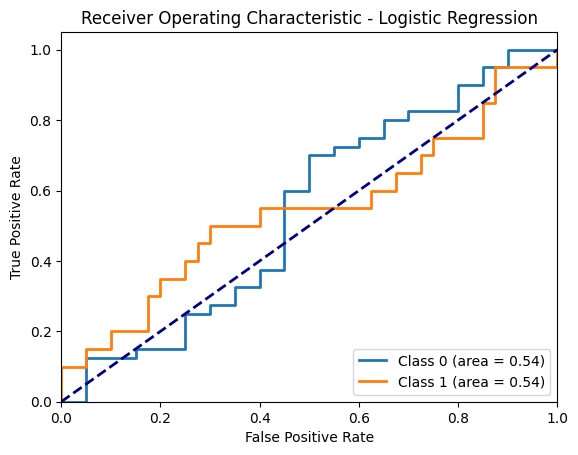

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Support Vector Machine
Accuracy: 0.6667
Precision: 0.3333
Recall: 0.5000
F1-score: 0.4000
ROC AUC: 0.5237




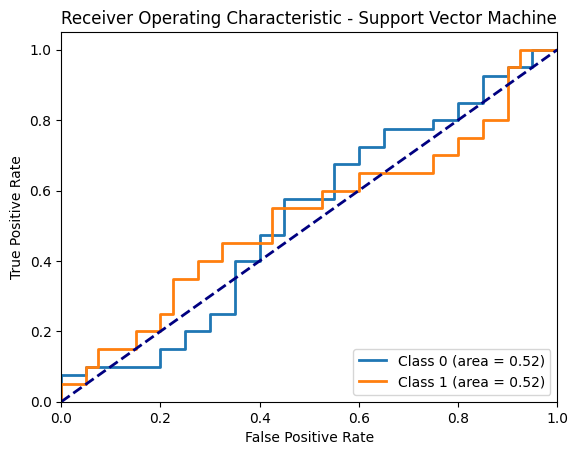

Model: Random Forest
Accuracy: 0.7000
Precision: 0.6852
Recall: 0.5750
F1-score: 0.5581
ROC AUC: 0.6200




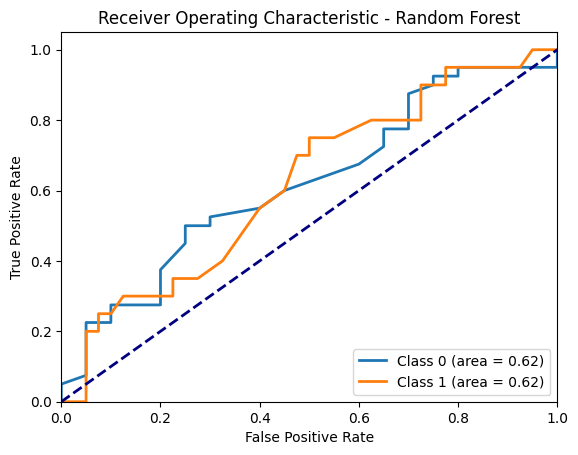

Model: Neural Network
Accuracy: 0.6333
Precision: 0.5794
Recall: 0.5750
F1-score: 0.5764
ROC AUC: 0.5925




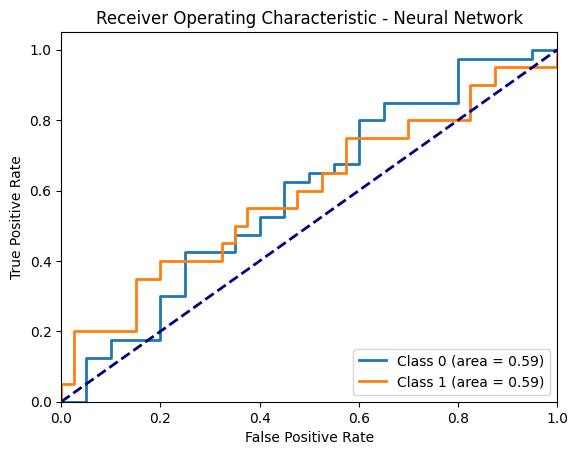

In [ ]:
import numpy as np
# Use TF-IDF Vectorizer to convert textual data to numerical data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_text = tfidf_vectorizer.fit_transform(merged_df['Headline'])

# Combine text features with sentiment score
X = pd.DataFrame(X_text.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X['Sentiment'] = merged_df['Sentiment'].values

# Define target variable
y = merged_df['Price Movement']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(max_iter=500)
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test) if hasattr(clf, "predict_proba") else clf.decision_function(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    if y_proba.ndim == 1:
        y_proba = y_proba.reshape(-1, 1)

    # Binarize the output labels for ROC AUC calculation
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test_binarized = lb.transform(y_test)

    if y_test_binarized.shape[1] == 1:
        y_test_binarized = np.hstack((1 - y_test_binarized, y_test_binarized))

    roc_auc = roc_auc_score(y_test_binarized, y_proba, multi_class='ovo', average='macro')

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\n")

    # Plot ROC curve
    fpr = {}
    tpr = {}
    roc_auc_dict = {}
    for i in range(y_test_binarized.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
        roc_auc_dict[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(y_test_binarized.shape[1]):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc_dict[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {name}')
    plt.legend(loc="lower right")
    plt.show()

Buy/Sell Signals and Portfolio value over time

[*********************100%%**********************]  1 of 1 completed


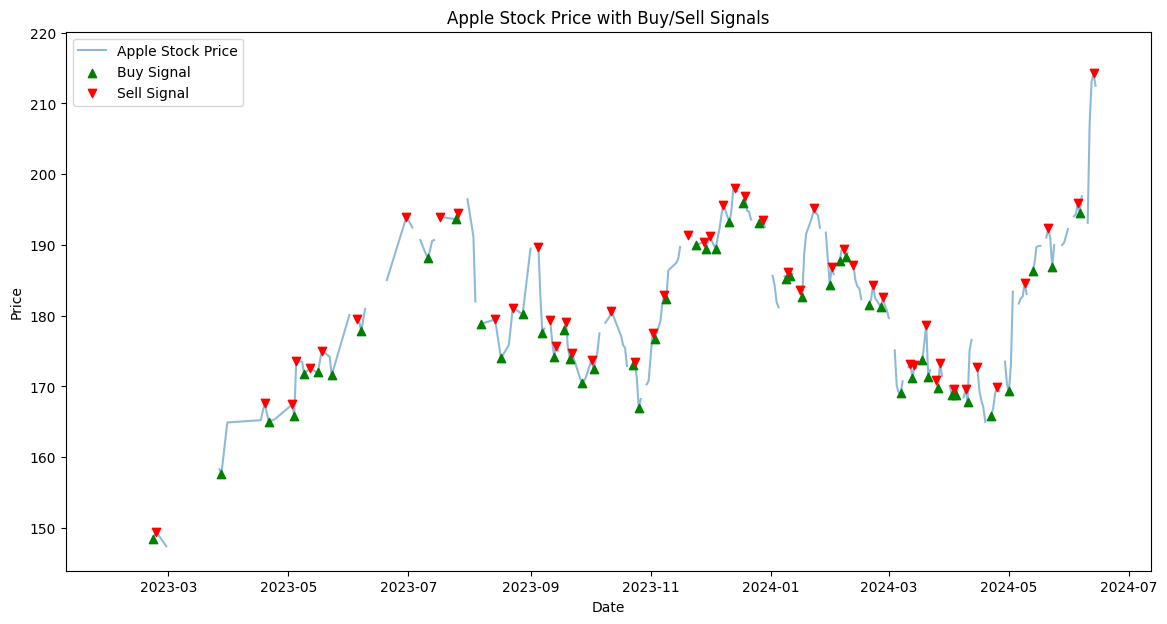

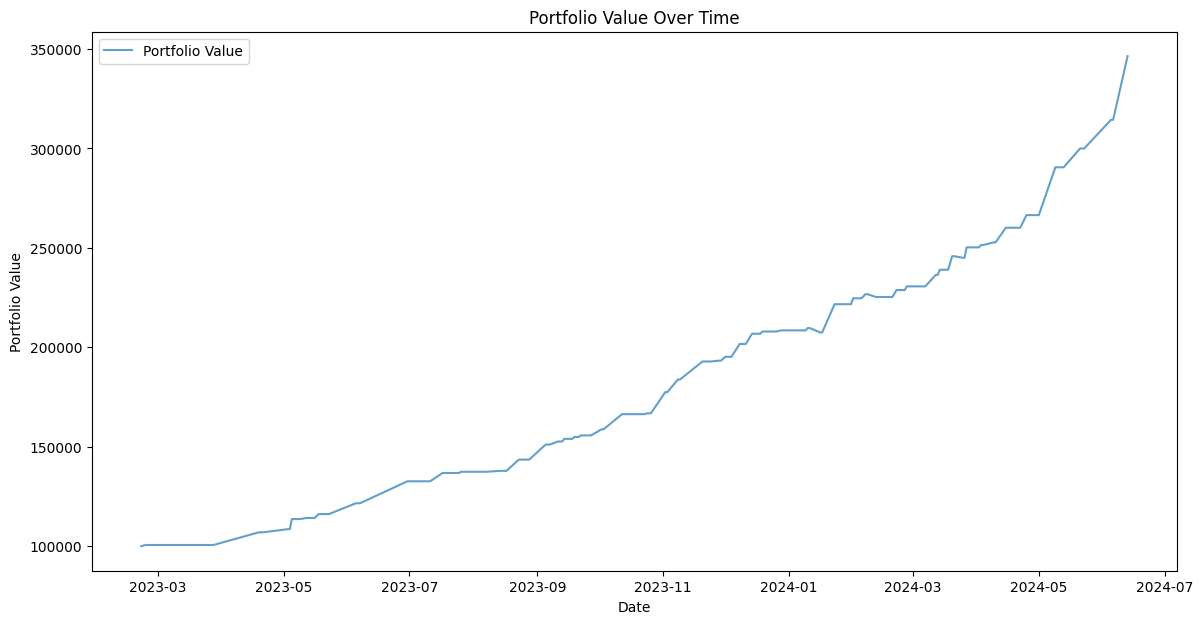

In [ ]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import yfinance as yf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt

# # Function to get FT Apple headlines
# def get_ft_apple_headlines(pages=100):
#     headlines = []
#     base_url = "https://www.ft.com/search?q=Apple&page={}"
#     headers = {
#         "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
#     }

#     for page in range(1, pages + 1):
#         url = base_url.format(page)
#         response = requests.get(url, headers=headers)
#         soup = BeautifulSoup(response.content, "html.parser")

#         for item in soup.find_all('div', class_='o-teaser__content'):
#             headline_tag = item.find('a', class_='js-teaser-heading-link')
#             date_tag = item.find('time', class_='o-teaser__timestamp-date')

#             if headline_tag and date_tag:
#                 headline = headline_tag.get_text().strip()
#                 date = date_tag.get_text().strip()
#                 headlines.append((headline, date))

#         time.sleep(2)

#     return headlines

# # Fetch FT news headlines related to Apple for 100 pages
# ft_apple_headlines = get_ft_apple_headlines(pages=100)

# # Create a DataFrame
# df = pd.DataFrame(ft_apple_headlines, columns=['Headline', 'Date'])

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by 'Date'
df = df.sort_values(by='Date')

# Group by 'Date' and combine headlines
grouped_df = df.groupby('Date').agg({'Headline': ' | '.join}).reset_index()

# Fetch Apple stock data using yfinance
start_date = grouped_df['Date'].min()
end_date = grouped_df['Date'].max()
aapl_data = yf.download('AAPL', start=start_date, end=end_date)

# Reset index to make 'Date' a column
aapl_data.reset_index(inplace=True)

# Merge the stock data with the grouped_df on the 'Date' column
merged_df = pd.merge(grouped_df, aapl_data, on='Date', how='left')

# Label stock price movements
merged_df['Price Movement'] = merged_df['Close'].diff().shift(-1)
merged_df['Price Movement'] = merged_df['Price Movement'].apply(lambda x: 'Increase' if x > 0 else ('Decrease' if x < 0 else 'No Change'))

# Drop rows with NaN values created by shift
merged_df = merged_df.dropna(subset=['Price Movement'])

# Perform sentiment analysis on the headlines
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(headline):
    vs = analyzer.polarity_scores(headline)
    return vs['compound']

merged_df['Sentiment'] = merged_df['Headline'].apply(analyze_sentiment)

# Use TF-IDF Vectorizer to convert textual data to numerical data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_text = tfidf_vectorizer.fit_transform(merged_df['Headline'])

# Combine text features with sentiment score
X = pd.DataFrame(X_text.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X['Sentiment'] = merged_df['Sentiment'].values

# Define target variable
y = merged_df['Price Movement']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(max_iter=500)
}

# Choose the classifier you want to use
clf = classifiers['Random Forest']
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Generate trading signals based on predictions
merged_df['Signal'] = clf.predict(X)

# Simulate trading strategy
initial_capital = 100000
capital = initial_capital
position = 0
portfolio = []

for i, row in merged_df.iterrows():
    if row['Price Movement'] == 'Increase' and position == 0:
        position = capital / row['Close']
        capital = 0
        portfolio.append((row['Date'], 'BUY', row['Close'], position, capital + position * row['Close']))
    elif row['Price Movement'] == 'Decrease' and position > 0:
        capital = position * row['Close']
        position = 0
        portfolio.append((row['Date'], 'SELL', row['Close'], position, capital))

portfolio_df = pd.DataFrame(portfolio, columns=['Date', 'Action', 'Price', 'Position', 'Portfolio Value'])

# Plot the stock price and buy/sell signals
plt.figure(figsize=(14, 7))
plt.plot(merged_df['Date'], merged_df['Close'], label='Apple Stock Price', alpha=0.5)
buy_signals = portfolio_df[portfolio_df['Action'] == 'BUY']
sell_signals = portfolio_df[portfolio_df['Action'] == 'SELL']
plt.scatter(buy_signals['Date'], buy_signals['Price'], marker='^', color='g', label='Buy Signal', alpha=1, zorder=3)
plt.scatter(sell_signals['Date'], sell_signals['Price'], marker='v', color='r', label='Sell Signal', alpha=1, zorder=3)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price with Buy/Sell Signals')
plt.legend()
plt.show()

# Plot the portfolio value over time
plt.figure(figsize=(14, 7))
plt.plot(portfolio_df['Date'], portfolio_df['Portfolio Value'], label='Portfolio Value', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.show()